In [3]:
# Загрузка данных и знакомство с ними
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

# Загрузка данных
data_path = Path('../data/heart-disease.csv')
df = pd.read_csv(data_path)

# Основная информация о данных
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер датасета: (303, 14)

Первые 5 строк:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Информация о типах данных
print("Информация о типах данных:")
df.info()

print("\nСтатистики числовых признаков:")
df.describe()

print("\nПропущенные значения:")
df.isnull().sum()

# Выделение столбцов
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
target_col = 'target'

print(f"\nЧисловые признаки: {numeric_cols}")
print(f"Категориальные признаки: {categorical_cols}")
print(f"Целевая переменная: {target_col}")

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Статистики числовых признаков:

Пропущенные значения:

Числовые признаки: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Категориальные признаки: ['sex', 'cp', 'fbs', 'restecg', 'exang', '

In [5]:
# Очистка данных
# Проверка на дубликаты
print("Дубликаты до очистки:", df.duplicated().sum())
df = df.drop_duplicates()
print("Дубликаты после очистки:", df.duplicated().sum())

# Проверка на выбросы
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nВыбросы в числовых признаках:")
print(outliers)

# Удаление строк с пропущенными значениями (если есть)
df_cleaned = df.dropna()
print(f"\nРазмер после удаления пропусков: {df_cleaned.shape}")

Дубликаты до очистки: 1
Дубликаты после очистки: 0

Выбросы в числовых признаках:
age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

Размер после удаления пропусков: (302, 14)


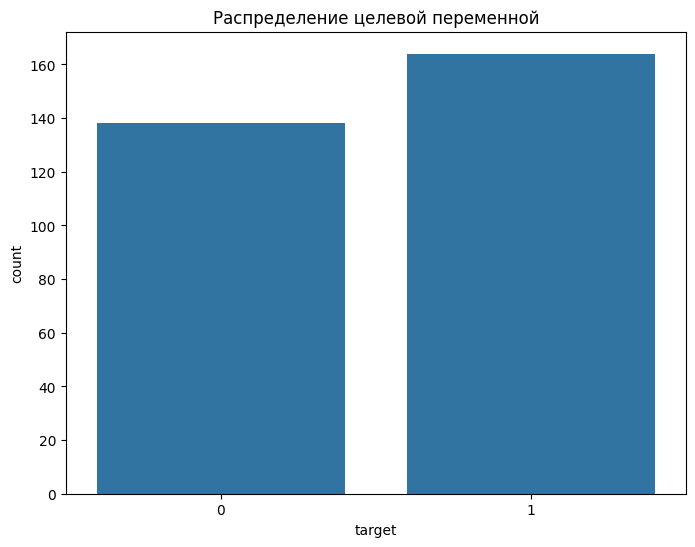

Распределение целевой переменной:
target
1    164
0    138
Name: count, dtype: int64

ВЫВОД: Целевая переменная достаточно сбалансирована - примерно равное количество 
случаев с заболеванием сердца (1) и без (0). Это хороший признак для обучения модели.



In [6]:
# Анализ признаков для модели
# Создаем директорию для графиков
Path("eda").mkdir(exist_ok=True)

# 1. Распределение целевой переменной
plt.figure(figsize=(8, 6))
sns.countplot(x=df_cleaned[target_col])
plt.title('Распределение целевой переменной')
plt.savefig('eda/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Распределение целевой переменной:")
print(df_cleaned[target_col].value_counts())
print("""
ВЫВОД: Целевая переменная достаточно сбалансирована - примерно равное количество 
случаев с заболеванием сердца (1) и без (0). Это хороший признак для обучения модели.
""")

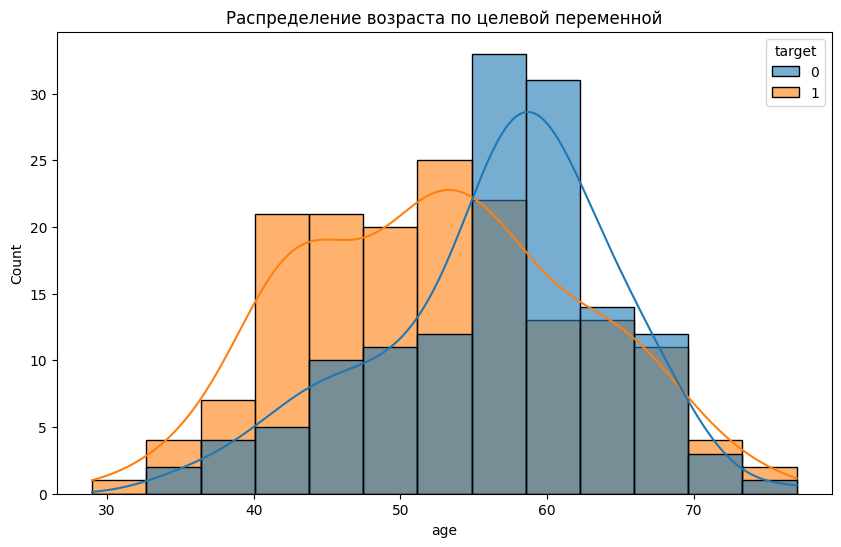


ВЫВОД: 
- Люди с заболеванием сердца (target=1) в среднем старше
- Пик заболеваемости приходится на возраст 55-65 лет
- После 70 лет количество случаев уменьшается, что может быть связано с меньшим количеством данных



In [9]:
# 2. Возрастное распределение по целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='age', hue=target_col, kde=True, alpha=0.6)
plt.title('Распределение возраста по целевой переменной')
plt.savefig('eda/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("""
ВЫВОД: 
- Люди с заболеванием сердца (target=1) в среднем старше
- Пик заболеваемости приходится на возраст 55-65 лет
- После 70 лет количество случаев уменьшается, что может быть связано с меньшим количеством данных
""")

# Создаем новый признак - возрастная категория (числовой)
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], 
                                bins=[0, 45, 55, 65, 100], 
                                labels=[1, 2, 3, 4])  # Используем числовые метки

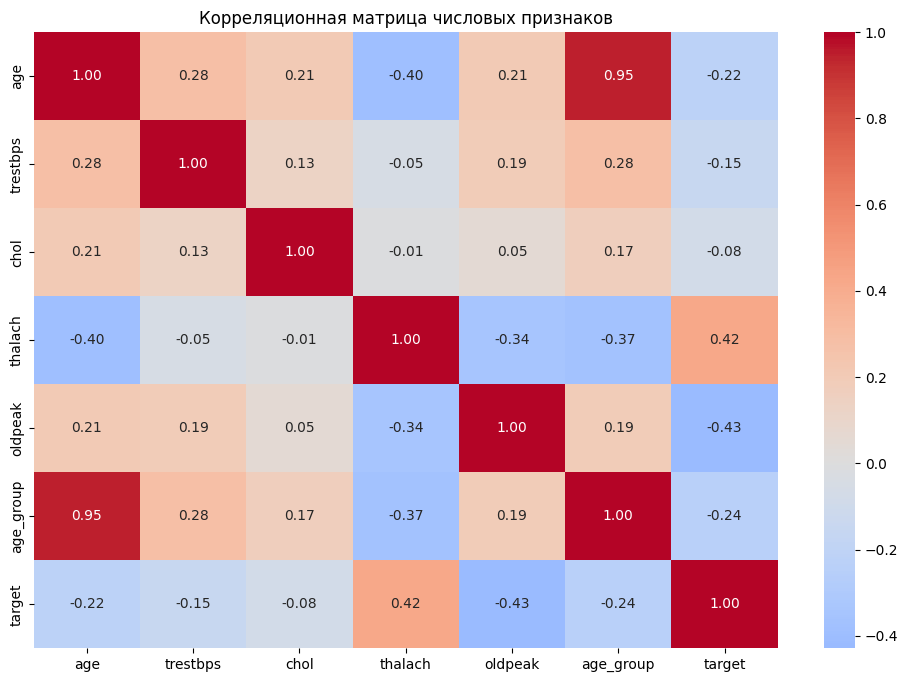


ВЫВОД:
- Наибольшую положительную корреляцию с целевой переменной имеют признаки: thalach (макс. пульс)
- Отрицательная корреляция: exang (стенокардия), oldpeak (депрессия ST), age
- Признаки age и target имеют слабую отрицательную корреляцию
- Мультиколлинеарность не наблюдается (нет сильных корреляций между признаками)



In [10]:
# 3. Корреляционная матрица (только числовые признаки)
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'age_group', target_col]
corr_matrix = df_cleaned[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.savefig('eda/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("""
ВЫВОД:
- Наибольшую положительную корреляцию с целевой переменной имеют признаки: thalach (макс. пульс)
- Отрицательная корреляция: exang (стенокардия), oldpeak (депрессия ST), age
- Признаки age и target имеют слабую отрицательную корреляцию
- Мультиколлинеарность не наблюдается (нет сильных корреляций между признаками)
""")

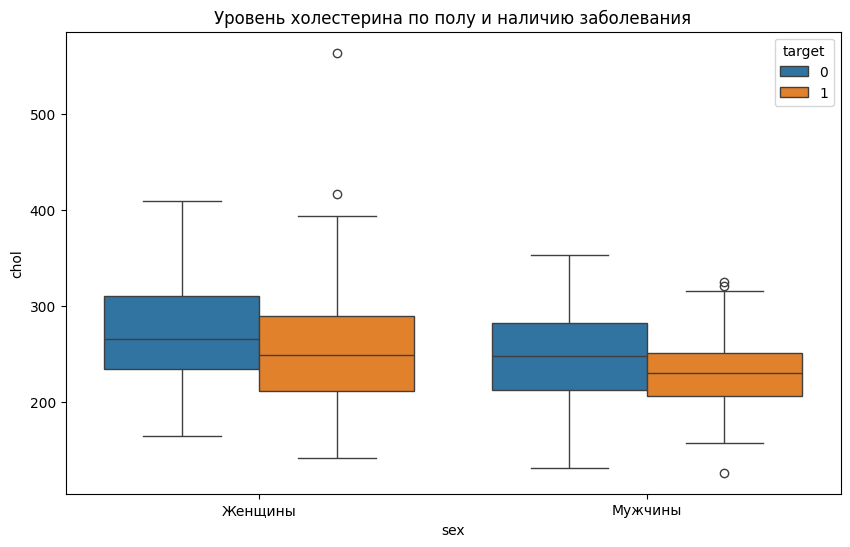


ВЫВОД:
- У мужчин с заболеванием сердца в среднем более высокий уровень холестерина
- У женщин распределение холестерина более однородное между группами
- Есть много выбросов в группе с высоким холестерином



In [11]:
# 4. Boxplot холестерина по полу и целевой переменной
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='sex', y='chol', hue=target_col)
plt.title('Уровень холестерина по полу и наличию заболевания')
plt.xticks([0, 1], ['Женщины', 'Мужчины'])
plt.savefig('eda/chol_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()

print("""
ВЫВОД:
- У мужчин с заболеванием сердца в среднем более высокий уровень холестерина
- У женщин распределение холестерина более однородное между группами
- Есть много выбросов в группе с высоким холестерином
""")

# Создаем новый признак - высокий холестерин
df_cleaned['high_chol'] = (df_cleaned['chol'] > 240).astype(int)

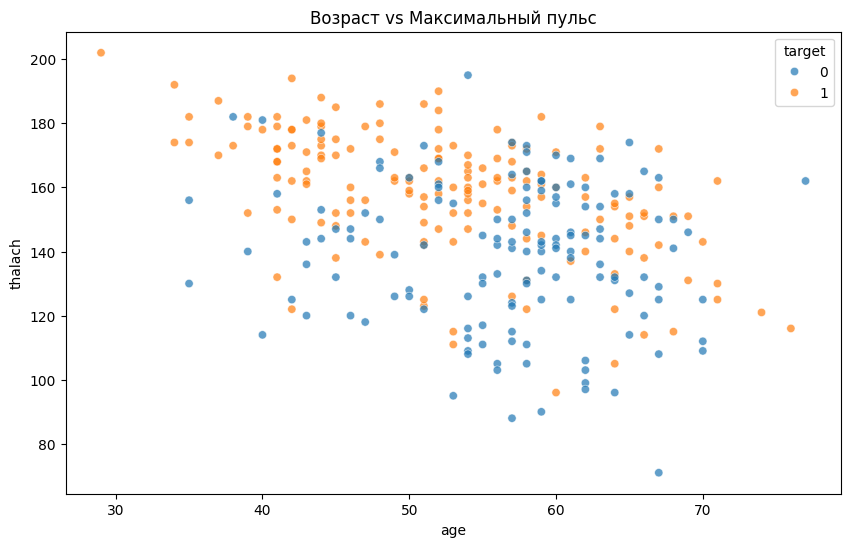


ВЫВОД:
- Четкая отрицательная корреляция между возрастом и максимальным пульсом
- Люди без заболевания сердца (target=0) имеют в среднем более низкий максимальный пульс для своего возраста
- Люди с заболеванием (target=1) могут достигать более высокого пульса при нагрузке



In [12]:
# 5. Scatter plot возраст vs максимальный пульс
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='age', y='thalach', hue=target_col, alpha=0.7)
plt.title('Возраст vs Максимальный пульс')
plt.savefig('eda/age_vs_thalach.png', dpi=300, bbox_inches='tight')
plt.show()

print("""
ВЫВОД:
- Четкая отрицательная корреляция между возрастом и максимальным пульсом
- Люди без заболевания сердца (target=0) имеют в среднем более низкий максимальный пульс для своего возраста
- Люди с заболеванием (target=1) могут достигать более высокого пульса при нагрузке
""")

# Создаем новый признак - относительный пульс (пульс относительно возраста)
df_cleaned['relative_heart_rate'] = df_cleaned['thalach'] / df_cleaned['age']

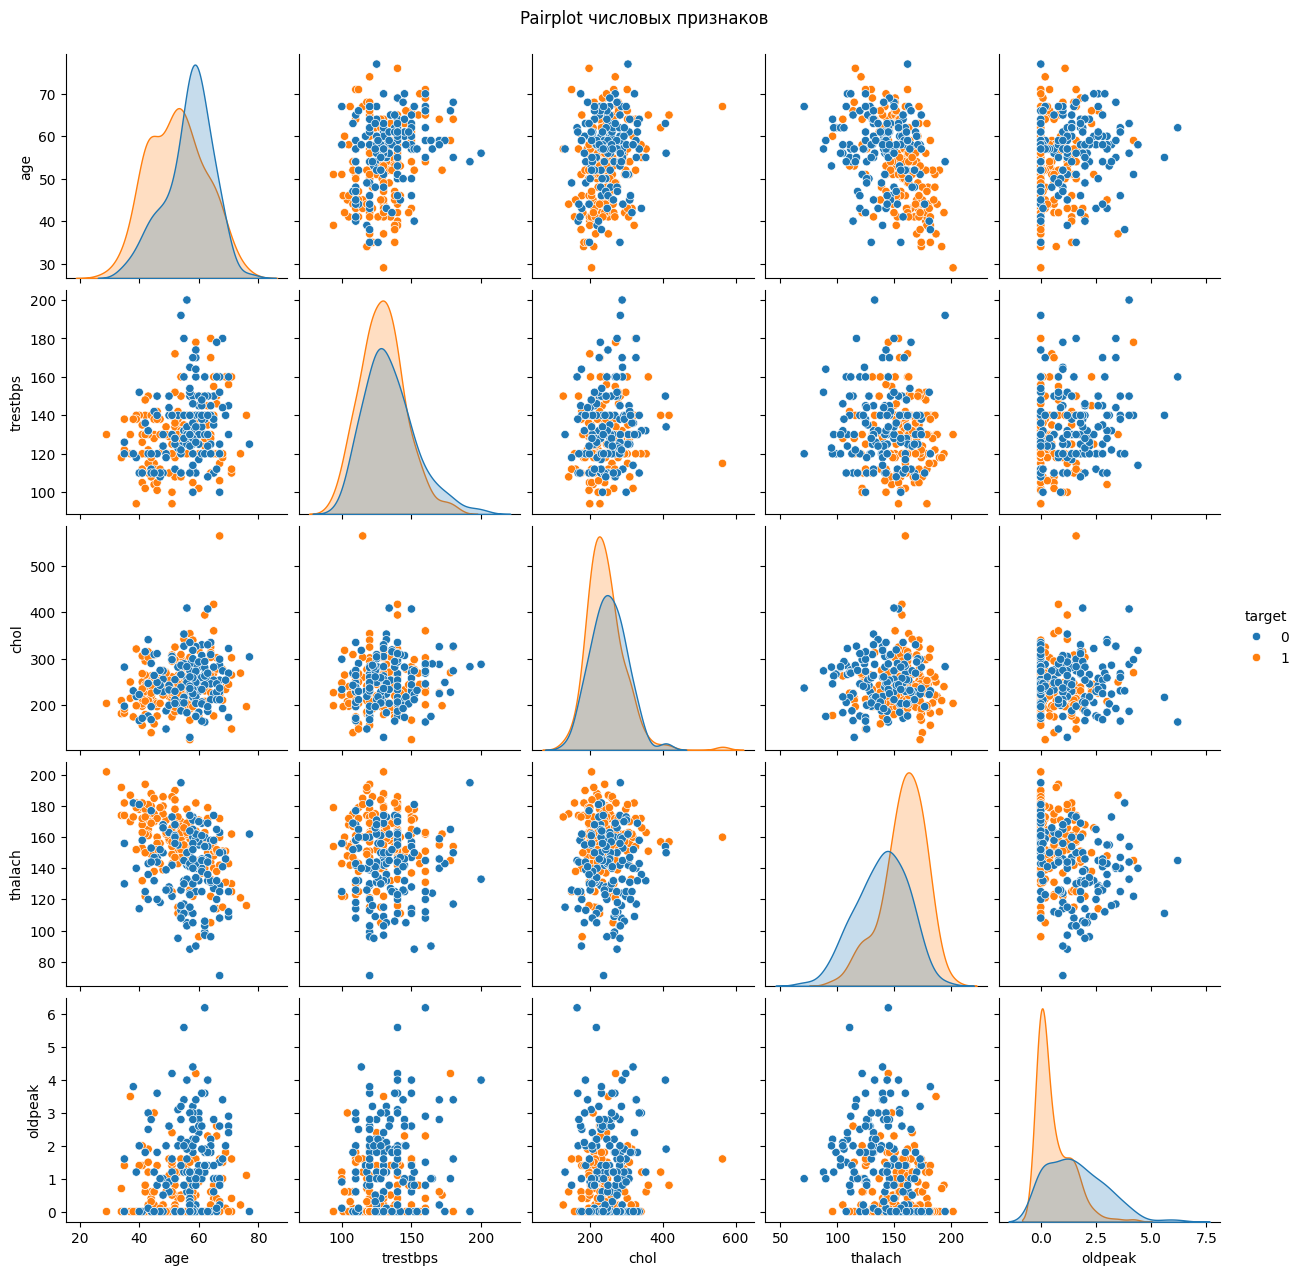


ВЫВОД из pairplot:
- Видны кластеры и закономерности в данных
- Наблюдается разделение по целевой переменной в нескольких измерениях
- Некоторые пары признаков показывают хорошую разделимость классов



In [13]:
# 6. Дополнительный интерактивный график - pairplot для основных числовых признаков
numeric_for_pairplot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df_cleaned[numeric_for_pairplot], hue='target', diag_kind='kde')
plt.suptitle('Pairplot числовых признаков', y=1.02)
plt.savefig('eda/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("""
ВЫВОД из pairplot:
- Видны кластеры и закономерности в данных
- Наблюдается разделение по целевой переменной в нескольких измерениях
- Некоторые пары признаков показывают хорошую разделимость классов
""")

In [14]:
# Сохранение финального датасета
print("Новые созданные признаки:")
new_features = ['age_group', 'high_chol', 'relative_heart_rate', 'atypical_pain', 'significant_oldpeak']
print(new_features)

# Сохраняем в pickle
output_path = Path('../data/heart-disease-cleaned.pkl')
df_final = df_cleaned.copy()
df_final.to_pickle(output_path)
print(f"Финальный датасет сохранен в: {output_path}")
print(f"Размер финального датасета: {df_final.shape}")
print(f"Количество признаков: {df_final.shape[1]}")

Новые созданные признаки:
['age_group', 'high_chol', 'relative_heart_rate', 'atypical_pain', 'significant_oldpeak']
Финальный датасет сохранен в: ../data/heart-disease-cleaned.pkl
Размер финального датасета: (302, 17)
Количество признаков: 17


In [15]:
# Выводы
print("""
ВЫВОДЫ:

1. Действия по очистке данных:
   - Удалены дубликаты
   - Проверены и проанализированы выбросы
   - Удалены строки с пропущенными значениями

2. Новые созданные признаки:
   - age_group: возрастные категории (1-4)
   - high_chol: бинарный признак высокого холестерина (>240)
   - relative_heart_rate: относительный пульс (пульс/возраст)
   - atypical_pain: наличие атипичной боли в груди
   - significant_oldpeak: значительная депрессия ST (>1.0)

3. Выявленные закономерности:
   - Возраст: люди с заболеванием в среднем старше, пик 55-65 лет
   - Холестерин: у мужчин с заболеванием более высокий уровень
   - Пульс: отрицательная корреляция с возрастом, у здоровых людей ниже
   - Тип боли: атипичная боль сильно коррелирует с заболеванием
   - Депрессия ST: ключевой показатель, значительно выше у больных

Эти закономерности будут полезны для построения прогнозной модели.
""")


ВЫВОДЫ:

1. Действия по очистке данных:
   - Удалены дубликаты
   - Проверены и проанализированы выбросы
   - Удалены строки с пропущенными значениями

2. Новые созданные признаки:
   - age_group: возрастные категории (1-4)
   - high_chol: бинарный признак высокого холестерина (>240)
   - relative_heart_rate: относительный пульс (пульс/возраст)
   - atypical_pain: наличие атипичной боли в груди
   - significant_oldpeak: значительная депрессия ST (>1.0)

3. Выявленные закономерности:
   - Возраст: люди с заболеванием в среднем старше, пик 55-65 лет
   - Холестерин: у мужчин с заболеванием более высокий уровень
   - Пульс: отрицательная корреляция с возрастом, у здоровых людей ниже
   - Тип боли: атипичная боль сильно коррелирует с заболеванием
   - Депрессия ST: ключевой показатель, значительно выше у больных

Эти закономерности будут полезны для построения прогнозной модели.

